In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
np.set_printoptions(legacy='1.25')

# Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.
# In this homework, we will use the lead scoring dataset. Download it from here.

# In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

# Data preparation

# Check if the missing values are presented in the features.
# If there are missing values:
# For caterogiral features, replace them with 'NA'
# For numerical features, replace with with 0.0
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

#df.columns

columns_with_missing_values = df.columns[df.isna().any()]
print(f"There are {len(columns_with_missing_values)} columns with missing values: {columns_with_missing_values}")

for column in columns_with_missing_values:
    if df[column].dtype == 'object': # replace missing values in categorical features with 'NA'
        df[column] = df[column].fillna('NA')
    else: # replace missing values in numerical features with 0.0
        df[column] = df[column].fillna(0.0)

numerical_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
#categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)
#print(f"categorical_features: {categorical_features}")

df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)
print(f"\nlen(df_full_train): {len(df_full_train)}, len(df_train): {len(df_train)}, len(df_valid): {len(df_valid)}, len(df_test): {len(df_test)}")

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_valid = df_valid.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_valid['converted']
del df_test['converted']

dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

valid_dict = df_valid[categorical_features + numerical_features].to_dict(orient='records')
X_valid = dv.transform(valid_dict)

y_pred = model.predict_proba(X_valid)[:,1]
converted_decision = (y_pred >= 0.5)
(y_valid == converted_decision).mean()

There are 5 columns with missing values: Index(['lead_source', 'industry', 'annual_income', 'employment_status',
       'location'],
      dtype='object')

len(df_full_train): 1169, len(df_train): 876, len(df_valid): 293, len(df_test): 293


0.6996587030716723

The amount of clients in the valid dataset: 293
When it comes to clients signing up to the platform, the number of correct decisions: 205
Accuracy is in converted decision: 0.6996587030716723

Test: 0.6996587030716723
0.00 0.584
0.05 0.584
0.10 0.584
0.15 0.584
0.20 0.584
0.25 0.584
0.30 0.594
0.35 0.601
0.40 0.642
0.45 0.679
0.50 0.700
0.55 0.747
0.60 0.747
0.65 0.734
0.70 0.693
0.75 0.655
0.80 0.614
0.85 0.567
0.90 0.495
0.95 0.433
1.00 0.416
Seems like the threshold with the best accuracy is around 0.55 - 0.60 in this data
accuracy_score: 0.6996587030716723

True negative (predict_negative & actual_negative): 41
False negative (predict_negative & actual_positive): 7
False positive (predict_positve & actual_negative): 81
True positive (predict_postive & actual_positive): 164

Precision: 0.6693877551020408
Recall: 0.9590643274853801

False positive rate or FPR: 0.6639344262295082
True positive rate or TPR: 0.9590643274853801
number_of_courses_viewed, 0.764
annual_income, 0.552
interac

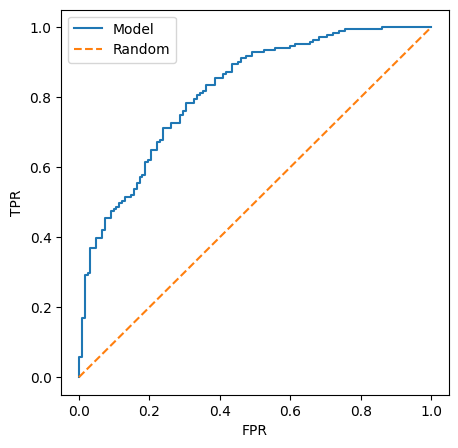

In [21]:
# Question 1: ROC AUC feature importance

# ROC AUC could also be used to evaluate feature importance of numerical variables.

# Let's do that

# For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
# Use the training dataset for that
# If your AUC is < 0.5, invert this variable by putting "-" in front

# (e.g. -df_train['balance'])

# AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

# Which numerical variable (among the following 4) has the highest AUC?

# lead_score
# number_of_courses_viewed
# interaction_count
# annual_income

#len(y_valid)
print(f"The amount of clients in the valid dataset: {len(y_valid)}")
#(y_valid == converted_decision).sum()
print(f"When it comes to clients signing up to the platform, the number of correct decisions: {(y_valid == converted_decision).sum()}")
print(f"Accuracy is in converted decision: {(y_valid == converted_decision).sum() / len(y_valid)}")
print(f"\nTest: {(y_valid == converted_decision).mean()}")

scores = []
thresholds = np.linspace(0, 1, 21)
for t in thresholds:
    converted_decision = (y_pred >= t)
    score = (y_valid == converted_decision).mean()
    print("%.2f %.3f" % (t, score))
    scores.append(score)

#plt.plot(thresholds, scores)
print(f"Seems like the threshold with the best accuracy is around 0.55 - 0.60 in this data")

from sklearn.metrics import accuracy_score
# accuracy_score(y_valid, converted_decision)
print(f"accuracy_score: {accuracy_score(y_valid, y_pred >= 0.5)}")

from collections import Counter
Counter(y_pred >= 1.0)
#y_valid.mean()
1 - y_valid.mean()

actual_positive = (y_valid == 1)
actual_negative = (y_valid == 0)
threshold = 0.5
predict_positive = (y_pred >= 0.5)
predict_negative = (y_pred < 0.5)

true_negative = (predict_negative & actual_negative).sum()
false_negative = (predict_negative & actual_positive).sum()
false_positive = (predict_positive & actual_negative).sum()
true_positive = (predict_positive & actual_positive).sum()

print(f"\nTrue negative (predict_negative & actual_negative): {true_negative}")
print(f"False negative (predict_negative & actual_positive): {false_negative}")
print(f"False positive (predict_positve & actual_negative): {false_positive}")
print(f"True positive (predict_postive & actual_positive): {true_positive}")

confusion_matrix = np.array([
    [true_negative, false_positive],
    [false_negative, true_positive]
])

(confusion_matrix / confusion_matrix.sum()).round(2)

precision = true_positive / (true_positive + false_positive)
print(f"\nPrecision: {precision}")
recall = true_positive / (true_positive + false_negative)
print(f"Recall: {recall}")

false_positive_rate = false_positive / (true_negative + false_positive)
print(f"\nFalse positive rate or FPR: {false_positive_rate}")
true_positive_rate = true_positive / (false_negative + true_positive)
print(f"True positive rate or TPR: {true_positive_rate}")

scores_t = []

thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    actual_positive_for_t = (y_valid == 1)
    actual_negative_for_t = (y_valid == 0)
    predict_positive_for_t = (y_pred >= t)
    predict_negative_for_t = (y_pred < t)

    tp = (predict_positive_for_t & actual_positive_for_t).sum()
    tn = (predict_negative_for_t  & actual_negative_for_t).sum()
    fp = (predict_positive_for_t & actual_negative_for_t).sum()
    fn = (predict_negative_for_t  & actual_positive_for_t).sum()

    scores_t.append((t, tp, tn, fp, fn))

columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores_t, columns=columns)
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
#df_scores[::10]

#plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
#plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
#plt.legend()

np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(y_valid))
((y_rand >= 0.5) == y_valid).mean()

def tpr_fpr_dataframe(y_valid, y_pred):
    scores_t = []
    
    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        actual_positive_for_t = (y_valid == 1)
        actual_negative_for_t = (y_valid == 0)
        
        predict_positive_for_t = (y_pred >= t)
        predict_negative_for_t = (y_pred < t)
    
        tp = (predict_positive_for_t & actual_positive_for_t).sum()
        tn = (predict_negative_for_t  & actual_negative_for_t).sum()
        
        fp = (predict_positive_for_t & actual_negative_for_t).sum()
        fn = (predict_negative_for_t  & actual_positive_for_t).sum()
    
        scores_t.append((t, tp, tn, fp, fn))

    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores_t, columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

df_rand = tpr_fpr_dataframe(y_valid, y_rand)
df_rand[::10]
#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
#plt.legend()

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

from sklearn.metrics import roc_auc_score
for c in numerical_features:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

print(f"Numerical variable with the highest AUC: number_of_courses_viewed")

In [22]:
# Question 2: Training the model

# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

# LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# What's the AUC of this model on the validation dataset? (round to 3 digits)

# 0.32
# 0.52
# 0.72
# 0.92

train_dicts = df_train[categorical_features + numerical_features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

valid_dicts = df_valid[categorical_features + numerical_features].to_dict(orient='records')
X_valid = dv.transform(valid_dicts)

y_pred = model.predict_proba(X_valid)[:, 1]

calculated_roc_auc_score = round(roc_auc_score(y_valid, y_pred), 3)

print(f"The calculated AUC rounded to 3 digits: {calculated_roc_auc_score}")
#print(f"Since the calculated AUC of this model is between two answer choices: 0.72 and 0.92, let's find which one is closer.")
#print(f"Difference between 0.72 and the calculated AUC: {abs(0.72 - calculated_roc_auc_score)}")
#print(f"Difference between 0.92 and the calculated AUC: {abs(0.92 - calculated_roc_auc_score)}")
print(f"The AUC of the model based on the answers choices is 0.92")

The calculated AUC rounded to 3 digits: 0.919
The AUC of the model based on the answers choices is 0.92


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    threshold   tp   tn  fp  fn       tpr       fpr         p         r
60       0.60  143  105  17  28  0.836257  0.139344  0.893750  0.836257
61       0.61  142  106  16  29  0.830409  0.131148  0.898734  0.830409
62       0.62  141  107  15  30  0.824561  0.122951  0.903846  0.824561
63       0.63  140  107  15  31  0.818713  0.122951  0.903226  0.818713
64       0.64  140  108  14  31  0.818713  0.114754  0.909091  0.818713
65       0.65  137  109  13  34  0.801170  0.106557  0.913333  0.801170
66       0.66  137  110  12  34  0.801170  0.098361  0.919463  0.801170
67       0.67  137  110  12  34  0.801170  0.098361  0.919463  0.801170
68       0.68  137  112  10  34  0.801170  0.081967  0.931973  0.801170
69       0.69  136  113   9  35  0.795322  0.073770  0.937931  0.795322


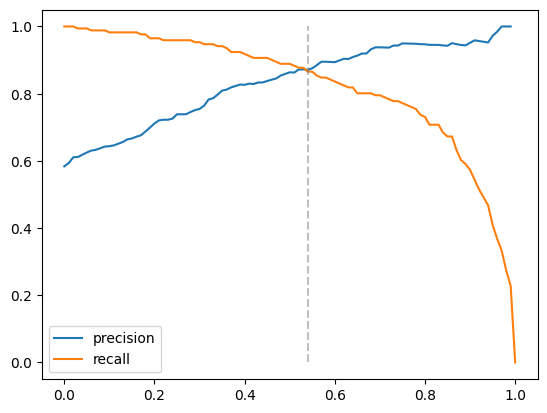

The precision and recall curves intersect at around 0.540
Closest option for the intersection: 0.545
threshold_at_min_diff_values: 0.54


In [23]:
# Question 3: Precision and Recall

# Now let's compute precision and recall for our model.

# Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# For each threshold, compute precision and recall
# Plot them
# At which threshold precision and recall curves intersect?

# 0.145
# 0.345
# 0.545
# 0.745

df_scores = tpr_fpr_dataframe(y_valid, y_pred)
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)
print(df_scores[60:70])

plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.540, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

print(f"The precision and recall curves intersect at around 0.540")
print(f"Closest option for the intersection: {0.545}")

df_scores["precision_recall_difference"] = np.abs(df_scores['p'] - df_scores['r'])
min_value_pr_diff_idx = df_scores['precision_recall_difference'].idxmin()
threshold_at_min_diff_value = df_scores.loc[min_value_pr_diff_idx, 'threshold']
print(f"threshold_at_min_diff_values: {threshold_at_min_diff_value}")

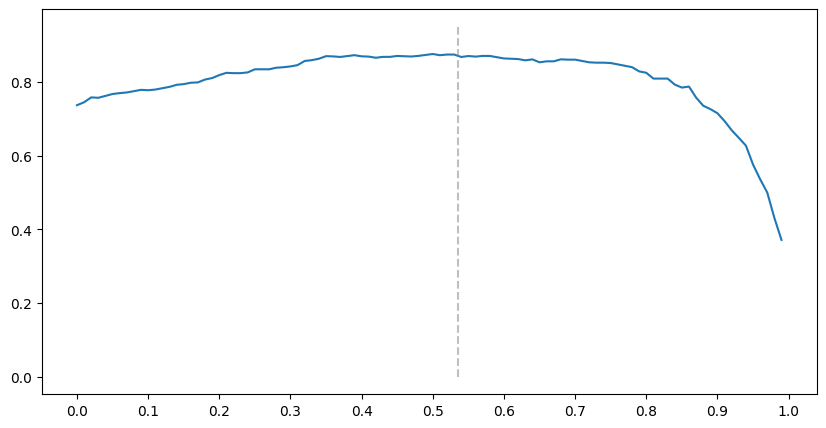

Based on the plot, at 0.535, the threshold F1 is maximal. So the best answer option: 0.54


In [27]:
# Question 4: F1 score

# Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

# This is the formula for computing F1:

# F1 = 2⋅(P⋅R)/(P+R)

# Where P is precision and R is recall.

# Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

# At which threshold F1 is maximal?

# 0.14
# 0.34
# 0.54
# 0.74

df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.535, 0, 0.95, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

print(f"Based on the plot, at {0.535}, the threshold F1 is maximal. So the best answer option: {0.54}")

In [28]:
# Question 5: 5-Fold CV

# Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

# KFold(n_splits=5, shuffle=True, random_state=1)
# Iterate over different folds of df_full_train
# Split the data into train and validation
# Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# Use AUC to evaluate the model on validation
# How large is standard deviation of the scores across different folds?

# 0.0001
# 0.006
# 0.06
# 0.36

from sklearn.model_selection import KFold

def train(df_train, y_train, C=1.0):
    dicts = df_train[numerical_features + categorical_features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[numerical_features + categorical_features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, valid_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_valid = df_full_train.iloc[valid_idx]

    y_train = df_train.converted.values
    y_valid = df_valid.converted.values

    dv, model = train(df_train, y_train, 1.0)
    y_pred = predict(df_valid, dv, model)

    auc = roc_auc_score(y_valid, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))
print(f"The standard deviation of the scores across the different folds is {0.036}, which closest to the answer option {0.06}")

0.822 +- 0.036
The standard deviation of the scores across the different folds is 0.036, which closest to the answer option 0.06


In [55]:
# Question 6: Hyperparameter Tuning

# Now let's use 5-Fold cross-validation to find the best parameter C

# Iterate over the following C values: [0.000001, 0.001, 1]
# Initialize KFold with the same parameters as previously
# Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
# Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
# Which C leads to the best mean score?

# 0.000001
# 0.001
# 1
# If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, valid_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_valid = df_full_train.iloc[valid_idx]

        y_train = df_train.converted.values
        y_valid = df_valid.converted.values

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%5s,  %.3f  +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06,  0.557  +- 0.000
C=0.001,  0.862  +- 0.002
C=    1,  0.806  +- 0.004
